<a href="https://colab.research.google.com/github/EvgenyEsin/Machine_learning/blob/main/Machine_learning_sem_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание

### 1. Загрузите тренировочные и тестовые датасеты

In [1]:
!pip install --upgrade category_encoders
import pandas as pd
import numpy as np
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

In [2]:
Xtrain.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


In [3]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [4]:
Xtrain[Xtrain.duplicated()]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target


Дубликатов нет

In [5]:
Xtrain.isna().sum()

,0
f1,0
f2,75
f3,0
f4,0
f5,0
f6,0
f7,1875
f8,0
f9,0
f10,0


Есть пропущенные значения

Заменим пропуски на средними значениями

In [6]:
# Запомним названия столбцов с пропущенными значениями
Null_col = ['f2', 'f7', 'f11']
# Заполним пропущенные значения средними
Xtrain[Null_col] = Xtrain[Null_col]. fillna(Xtrain[Null_col].mean())
Xtrain.isna().sum()

,0
f1,0
f2,0
f3,0
f4,0
f5,0
f6,0
f7,0
f8,0
f9,0
f10,0


Пропусков больше нет

In [7]:
Xtest.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0


In [8]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB


In [9]:
Xtest[Xtest.duplicated()]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target


Дубликатов нет

In [10]:
Xtest.isna().sum()

,0
f1,0
f2,0
f3,0
f4,0
f5,0
f6,0
f7,0
f8,0
f9,0
f10,0


Пропусков нет

### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

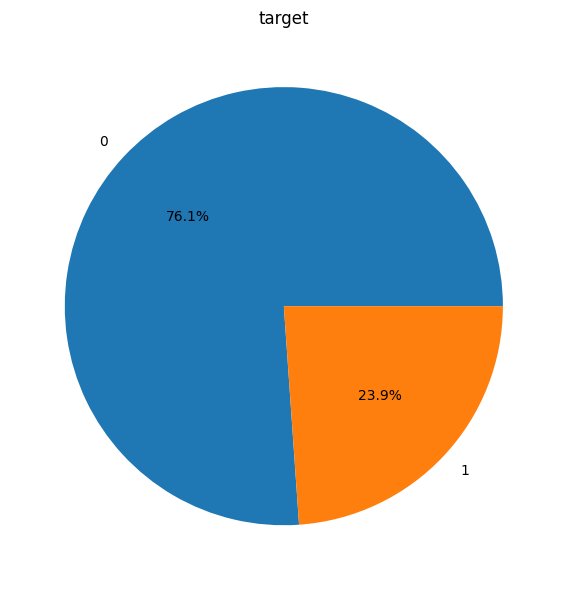

In [11]:
Xtrain.target.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,6))
plt.title('target')
plt.tight_layout()
plt.axis('off');

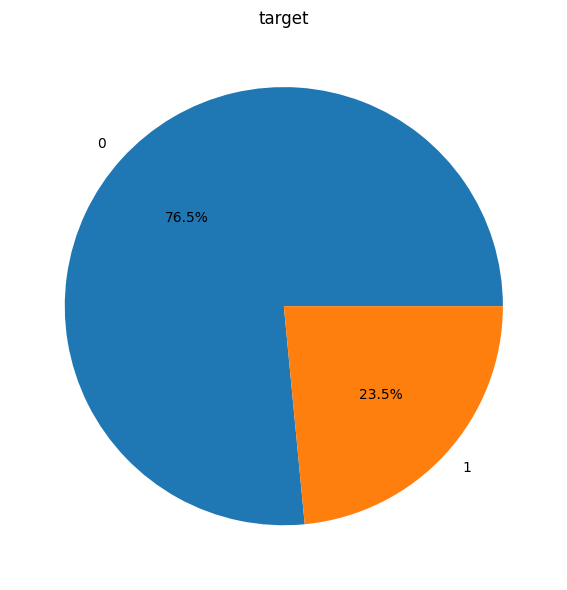

In [12]:
Xtest.target.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,6))
plt.title('target')
plt.tight_layout()
plt.axis('off');

Дисбаланс класса 1 к 4

Accuracy — это показатель, который описывает общую точность предсказания модели по всем классам. Это особенно полезно, когда каждый класс одинаково важен. Он рассчитывается как отношение количества правильных прогнозов к их общему количеству. Метрика accuracy может быть обманчивой. Один из таких случаев — это несбалансированные данные. В нашем случае у нас есть 76% единиц данных нулевого класса, и только 24% — класс "1". Поскольку большинство семплов принадлежит к одному классу, accuracy для этого класса будет выше, чем для другого. Если предположить, что точность модели составляет 90%, мы можем подумать, что для любой выборки (независимо от ее класса) модель сделает правильный прогноз в 90%. Это неверно, так как для класса "1" модель работает очень плохо.

Для балансировки данных используем метод upsampling data

In [13]:
# Найдем соотношение количества строк с 0 и 1
n = len(Xtrain.loc[Xtrain['target']==0])//len(Xtrain.loc[Xtrain['target']==1])
n

3

Создадим новый датасет методом upsampling:

возьмём все данные с классом 1

продублируем их n раз

присоединим к данным класса 0 продублированный класс 1 и перемешаем

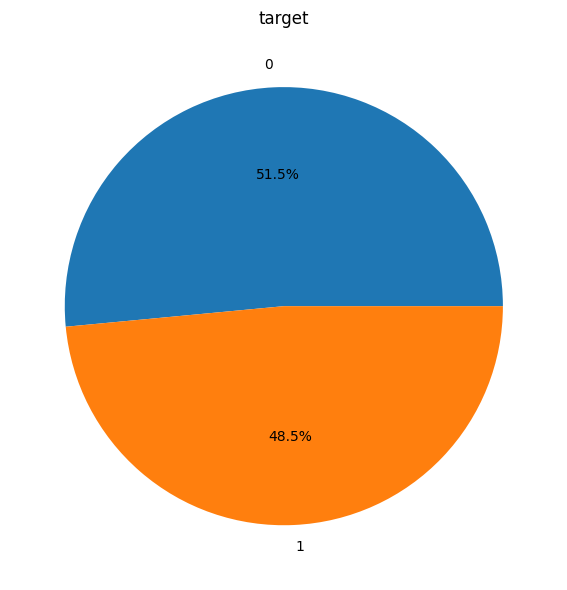

In [14]:
Xtrain_1 = Xtrain.loc[Xtrain['target']==1]
Xtrain_1 = Xtrain_1.loc[Xtrain_1.index.repeat(n)]
Xtrain = pd.concat([Xtrain.loc[Xtrain['target']==0], Xtrain_1]).sample(frac=1)

# визуализируем баланс класса
Xtrain.target.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,6))
plt.title('target')
plt.tight_layout()
plt.axis('off');

То же самое сделаем для Xtest

In [15]:
# Найдем соотношение количества строк с 0 и 1
n = len(Xtest.loc[Xtest['target']==0])//len(Xtest.loc[Xtest['target']==1])
n

3

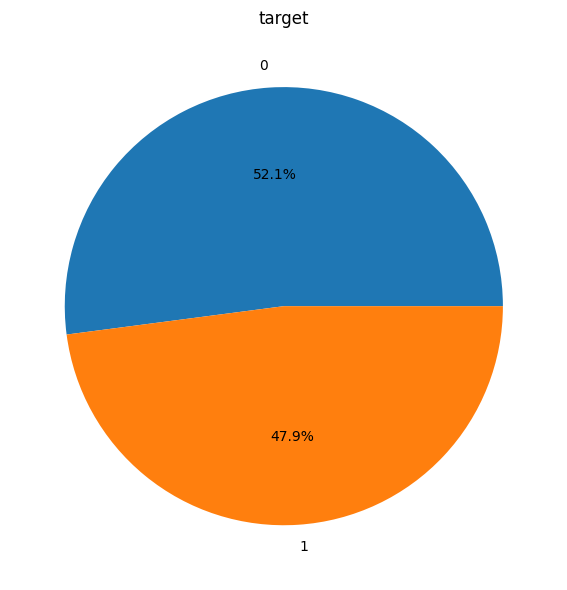

In [16]:
Xtest_1 = Xtest.loc[Xtest['target']==1]
Xtest_1 = Xtest_1.loc[Xtest_1.index.repeat(n)]
Xtest = pd.concat([Xtest.loc[Xtest['target']==0], Xtest_1]).sample(frac=1)

# визуализируем баланс класса
Xtest.target.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,6))
plt.title('target')
plt.tight_layout()
plt.axis('off');

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [17]:
from sklearn.metrics import f1_score

# Ваш код здесь

In [18]:
X_train = Xtrain.drop(['target'], axis=1)
y_train = Xtrain['target']

In [19]:
X_test = Xtest.drop(['target'], axis=1)
y_test = Xtest['target']

In [20]:
#функция для вывода параметров модели
def model_report(model, X, y, label):

    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)
    y_proba_one = y_proba[:, 1]

    roc_auc = roc_auc_score(y, y_proba_one)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)

    results.loc[label, 'AUC-ROC'] = roc_auc
    results.loc[label, 'Accuracy'] = accuracy
    results.loc[label, 'Precision'] = precision
    results.loc[label, 'Recall'] = recall
    results.loc[label, 'F1'] = f1

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    fpr, tpr, thresholds = roc_curve(y, y_proba_one)
    lw = 2
    axes[0].plot(fpr, tpr, lw=lw, color='grey')
    axes[0].plot([0, 1], [0, 1], color='r')
    axes[0].set_xlim([-0.02, 1])
    axes[0].set_ylim([0.0, 1.02])
    axes[0].set_xlabel('\nFalse Positive Rate')
    axes[0].set_ylabel('True Positive Rate\n')
    axes[0].text(0.6, 0.2,
                'ROC-AUC = {:.2f}\n\nAccuracy = {:.2f}\n\nPrecision = {:.2f}\n\nRecall = {:.2f}\n\nF1 = {:.2f}'
                 .format(roc_auc, accuracy, precision, recall, f1))

    cm = confusion_matrix(y, y_pred)
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    pcts = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, pcts)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Reds', fmt ='', ax=axes[1])
    axes[1].set_xlabel('\nPredict')
    axes[1].set_ylabel('True value\n')

    plt.tight_layout()
    plt.show()

    report = classification_report(
        y, y_pred,
        target_names=['0', '1'], output_dict=True
    )

In [21]:
results = pd.DataFrame(
    [[0] * 5] * 2,
    index=['LogisticRegression', 'SVC'],
    columns=['AUC-ROC', 'Accuracy', 'Precision', 'Recall', 'F1'])

## Логистическая регрессия

In [22]:
# Инициализируем модель машинного обучения с параметрами по умолчанию
model_lr = LogisticRegression(max_iter=1000)

In [23]:
# Обучим модель на обучающем наборе
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

<ipython-input-20-d1197e63f83a>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.795190888843571' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[label, 'AUC-ROC'] = roc_auc
<ipython-input-20-d1197e63f83a>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7207403375068046' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[label, 'Accuracy'] = accuracy
<ipython-input-20-d1197e63f83a>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7324478178368121' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[label, 'Precision'] = precision
<ipython-input-20-d1197e63f83a>:17: FutureWarning: Se

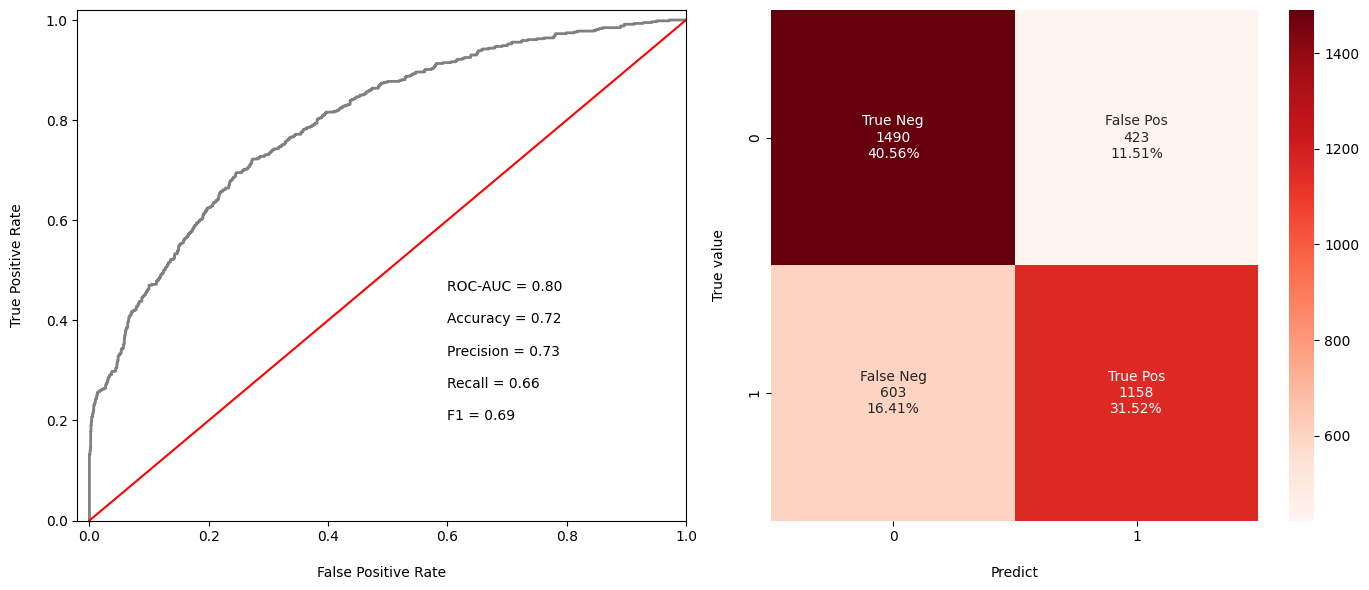

In [24]:
# Результаты работы модели на тестовых данных
model_report(model_lr, X_test, y_test, label='LogisticRegression')

In [25]:
pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1913
           1       0.73      0.66      0.69      1761

    accuracy                           0.72      3674
   macro avg       0.72      0.72      0.72      3674
weighted avg       0.72      0.72      0.72      3674



## SVC

Обучим на тренировочных данных метод опорных векторов с параметрами по
умолчанию

In [26]:
from sklearn.svm import SVC
# Инициализируем модель машинного обучения с параметрами по умолчанию
model_SVC = SVC()
model_SVC.fit(X_train, y_train)

SVC()

In [27]:
# Результаты работы модели на тестовых данных
pred_unb = model_SVC.predict(X_test)

In [28]:
print(classification_report(y_test, pred_unb))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72      1913
           1       1.00      0.18      0.30      1761

    accuracy                           0.60      3674
   macro avg       0.78      0.59      0.51      3674
weighted avg       0.77      0.60      0.52      3674



Обе модели плохо определяют объекты класса "1"

### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [29]:
# Ваш код здесь

LogisticRegression

In [30]:
#подбор параметров модели

RANDOM_STATE = 43

paramsLR = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
modelLR = LogisticRegression(random_state= RANDOM_STATE, solver='liblinear', class_weight='balanced')

gridLR = GridSearchCV(modelLR, paramsLR, cv=3, scoring='roc_auc')

gridLR.fit(X_train, y_train)

score_lr = gridLR.best_score_

print('Лучшие параметры:', gridLR.best_params_)
print('ROC-AUC:', score_lr)

Лучшие параметры: {'C': 1000.0, 'penalty': 'l1'}
ROC-AUC: 0.8966108137038787


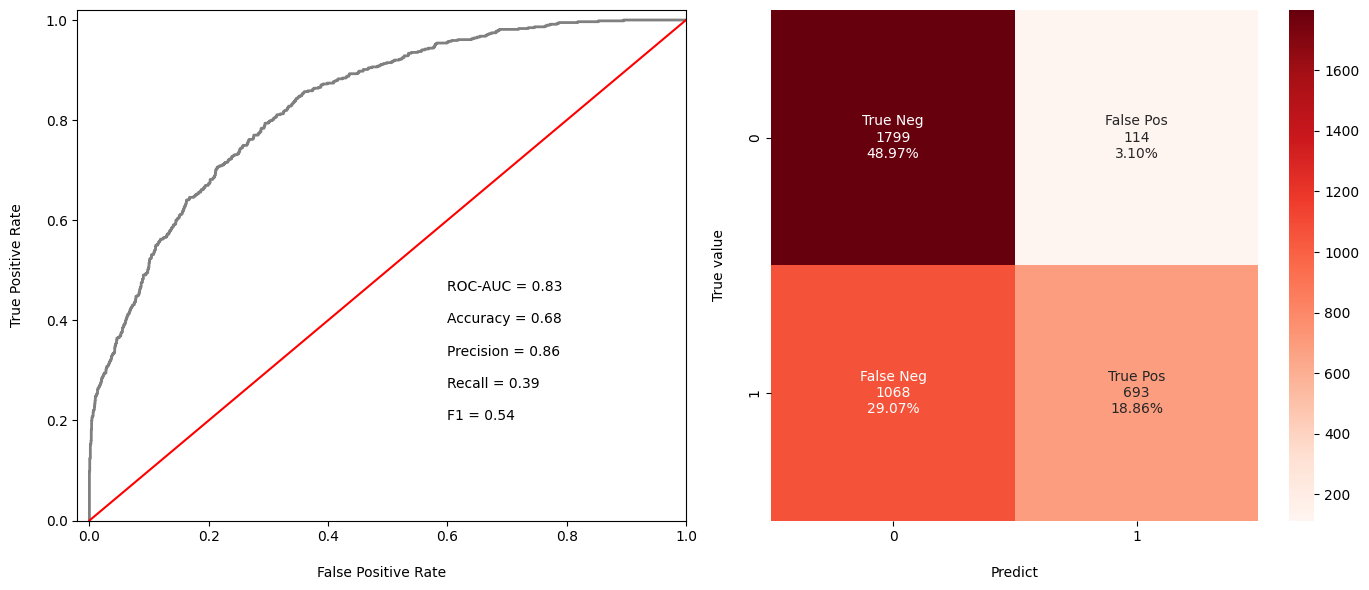

In [31]:
model_lr = LogisticRegression(random_state=RANDOM_STATE,
                              C=1000, penalty='l1',
                              solver='liblinear',
                              class_weight='balanced')
model_lr.fit(X_train, y_train)

model_report(model_lr, X_test, y_test, label='LogisticRegression')

In [32]:
pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.63      0.94      0.75      1913
           1       0.86      0.39      0.54      1761

    accuracy                           0.68      3674
   macro avg       0.74      0.67      0.65      3674
weighted avg       0.74      0.68      0.65      3674



## SVC

Метод опорных векторов (SVM) использует ядро (kernel) для преобразования
пространства данных, в котором находятся объекты, чтобы разделить их на классы.
Ядро определяет функцию сходства между объектами в новом пространстве
признаков.

In [33]:
from sklearn import svm, datasets

In [34]:
C = 1.0 # параметр регуляризации SVM
# linear_svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
# Создаем экземпляр SVM и обучаем модель с использованием RBF-ядро
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
# Создаем экземпляр SVM и обучаем модель с использованием полиномиального ядра
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X_train, y_train)
# Создаем экземпляр SVM и обучаем модель с использованием сигмоидного ядра
sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X_train, y_train)
# оцениваем качество моделей
# print('Accuracy of linear kernel:', accuracy_score(y_test, linear_svc.predict(X_test)))
print('Accuracy of RBF kernel:', accuracy_score(y_test, rbf_svc.predict(X_test)))
print('Accuracy of polynomial kernel:', accuracy_score(y_test, poly_svc.predict(X_test)))
print('Accuracy of sigmoid kernel:', accuracy_score(y_test, sig_svc.predict(X_test)))

Accuracy of RBF kernel: 0.5206859009254219
Accuracy of polynomial kernel: 0.592814371257485
Accuracy of sigmoid kernel: 0.5351115949918345


### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [ ]:
# Ваш код здесь

Модель линейной регрессии показала лучшие результаты

In [35]:
pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.63      0.94      0.75      1913
           1       0.86      0.39      0.54      1761

    accuracy                           0.68      3674
   macro avg       0.74      0.67      0.65      3674
weighted avg       0.74      0.68      0.65      3674



### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [ ]:
# Ваш код здесь

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?

In [ ]:
# Ваш текст здесь

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.